In [28]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import requests
import pandas as pd
import statistics as st
import scipy.stats as stats
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
#import plotly.express as px
# import plotly.graph_objects as go

# set default dpi to 300
mpl.rcParams['figure.dpi'] = 300

## File to Load
# populations_Growth = "Resources/populations_Growth_Rate.csv"
pop_data = "Resources/populations.csv"
combined_data = "Resources/combined_data.csv"
seven_yrChange = "Resources/pop_seven_yrChange.csv"

## Read Population Files and store into Pandas data frame
# populations_Growth_df = pd.read_csv(populations_Growth)
pop_df = pd.read_csv(pop_data)
combined_df = pd.read_csv(combined_data)
seven_yrChange_df = pd.read_csv(seven_yrChange)

##Removes "United States" and renames "Geographic Area" to "State"
seven_yrChange_df = seven_yrChange_df.rename(columns={"Geographic Area":"State"})
seven_yrChange_df = seven_yrChange_df[seven_yrChange_df['State'] != "United States"]

In [29]:
# populations_Growth_df
# populations_ByYear_df
seven_yrChange_df.head()

,State,7 Year Change,Area (Sq. Mi)
1,Alabama,205206,52423
2,Alaska,46586,656425
3,Arizona,894204,114006
4,Arkansas,157079,53182
5,California,1770853,163707


In [30]:
combined_df = combined_df.merge(seven_yrChange_df, on = "State")

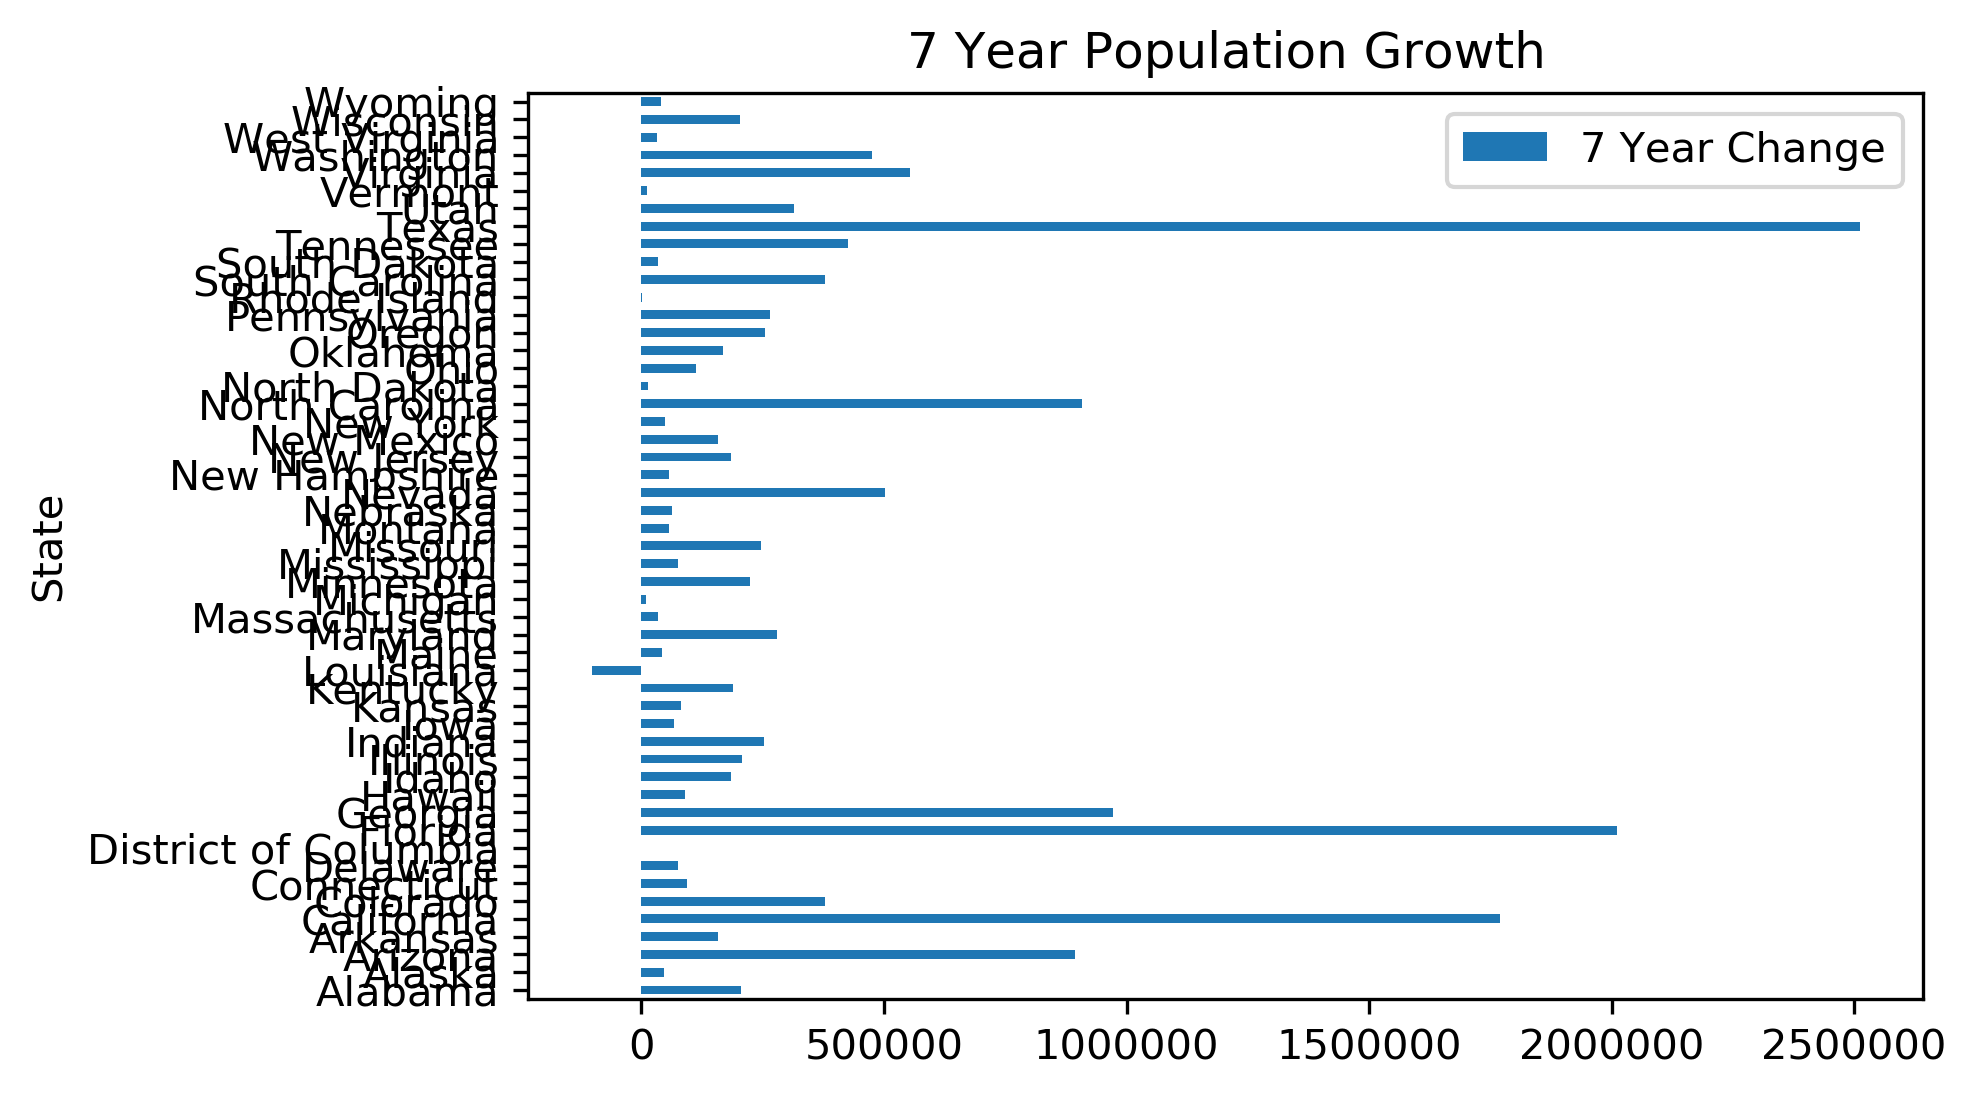

In [31]:
ax = seven_yrChange_df.plot(kind="barh", x= "State", y="7 Year Change", title="7 Year Population Growth")
ax.figure.savefig("Images/Seven Year Pop Growth.png", DPI=300)

In [32]:
combined_df.head()

,Year,Month,State,TAVG,Population,Pop Growth Rate,Consumption,7 Year Change,Area (Sq. Mi)
0,2001,1,Alabama,41.736,4467634,0.003473,64497509.0,205206,52423
1,2001,2,Alabama,52.996,4467634,0.003473,55262245.0,205206,52423
2,2001,3,Alabama,52.004,4467634,0.003473,57230386.0,205206,52423
3,2001,4,Alabama,64.964,4467634,0.003473,48047333.0,205206,52423
4,2001,5,Alabama,71.092,4467634,0.003473,60217334.0,205206,52423


In [33]:
combined_df["Population Density"] = combined_df["Population"] / combined_df["Area (Sq. Mi)"]
combined_df

,Year,Month,State,TAVG,Population,Pop Growth Rate,Consumption,7 Year Change,Area (Sq. Mi),Population Density
0,2001,1,Alabama,41.736,4467634,0.003473,64497509.0,205206,52423,85.222784
1,2001,2,Alabama,52.996,4467634,0.003473,55262245.0,205206,52423,85.222784
2,2001,3,Alabama,52.004,4467634,0.003473,57230386.0,205206,52423,85.222784
3,2001,4,Alabama,64.964,4467634,0.003473,48047333.0,205206,52423,85.222784
4,2001,5,Alabama,71.092,4467634,0.003473,60217334.0,205206,52423,85.222784
...,...,...,...,...,...,...,...,...,...,...
4262,2007,8,Wyoming,68.132,534876,0.023359,46454238.0,40219,97818,5.468073
4263,2007,9,Wyoming,57.536,534876,0.023359,43742967.0,40219,97818,5.468073
4264,2007,10,Wyoming,45.324,534876,0.023359,43819838.0,40219,97818,5.468073
4265,2007,11,Wyoming,34.868,534876,0.023359,43628693.0,40219,97818,5.468073


In [34]:
combined_df['Energy per Person'] = combined_df['Consumption'] / combined_df['Population']
combined_df.head()

,Year,Month,State,TAVG,Population,Pop Growth Rate,Consumption,7 Year Change,Area (Sq. Mi),Population Density,Energy per Person
0,2001,1,Alabama,41.736,4467634,0.003473,64497509.0,205206,52423,85.222784,14.436614
1,2001,2,Alabama,52.996,4467634,0.003473,55262245.0,205206,52423,85.222784,12.369466
2,2001,3,Alabama,52.004,4467634,0.003473,57230386.0,205206,52423,85.222784,12.809999
3,2001,4,Alabama,64.964,4467634,0.003473,48047333.0,205206,52423,85.222784,10.754537
4,2001,5,Alabama,71.092,4467634,0.003473,60217334.0,205206,52423,85.222784,13.478574


In [64]:
yearly_consumption = combined_df.groupby(["Year","State"])["Consumption"].sum()
yearly_consumption_df = pd.DataFrame(yearly_consumption).reset_index()
yearly_consumption_df

,Year,State,Consumption
0,2001,Alabama,7.446406e+08
1,2001,Alaska,6.551620e+07
2,2001,Arizona,5.215141e+08
3,2001,Arkansas,3.238006e+08
4,2001,California,1.122801e+09
...,...,...,...
352,2007,Virginia,3.861636e+08
353,2007,Washington,1.639249e+08
354,2007,West Virginia,7.264437e+08
355,2007,Wisconsin,5.227837e+08


In [67]:
yearly_population = combined_df.groupby(["Year","State"])["Population"].mean()
yearly_population_df = pd.DataFrame(yearly_population).reset_index()
yearly_population_df

,Year,State,Population
0,2001,Alabama,4467634
1,2001,Alaska,633714
2,2001,Arizona,5273477
3,2001,Arkansas,2691571
4,2001,California,34479458
...,...,...,...
352,2007,Virginia,7751000
353,2007,Washington,6461587
354,2007,West Virginia,1834052
355,2007,Wisconsin,5610775


In [68]:
yearly_merged_df = yearly_population_df.merge(yearly_consumption_df, on= ["Year","State"])
yearly_merged_df

,Year,State,Population,Consumption
0,2001,Alabama,4467634,7.446406e+08
1,2001,Alaska,633714,6.551620e+07
2,2001,Arizona,5273477,5.215141e+08
3,2001,Arkansas,2691571,3.238006e+08
4,2001,California,34479458,1.122801e+09
...,...,...,...,...
352,2007,Virginia,7751000,3.861636e+08
353,2007,Washington,6461587,1.639249e+08
354,2007,West Virginia,1834052,7.264437e+08
355,2007,Wisconsin,5610775,5.227837e+08


In [69]:
yearly_merged_df = yearly_merged_df.merge(seven_yrChange_df, on= ["State"])
yearly_merged_df

,Year,State,Population,Consumption,7 Year Change,Area (Sq. Mi)
0,2001,Alabama,4467634,744640650.0,205206,52423
1,2002,Alabama,4480089,777662124.0,205206,52423
2,2003,Alabama,4503491,786555191.0,205206,52423
3,2004,Alabama,4530729,798417672.0,205206,52423
4,2005,Alabama,4569805,820363954.0,205206,52423
...,...,...,...,...,...,...
352,2003,Wyoming,503453,494432317.0,40219,97818
353,2004,Wyoming,509106,502626342.0,40219,97818
354,2005,Wyoming,514157,503735258.0,40219,97818
355,2006,Wyoming,522667,501813587.0,40219,97818


In [70]:
yearly_merged_df["Population Density"] = combined_df["Population"] / combined_df["Area (Sq. Mi)"]
yearly_merged_df

,Year,State,Population,Consumption,7 Year Change,Area (Sq. Mi),Population Density
0,2001,Alabama,4467634,744640650.0,205206,52423,85.222784
1,2002,Alabama,4480089,777662124.0,205206,52423,85.222784
2,2003,Alabama,4503491,786555191.0,205206,52423,85.222784
3,2004,Alabama,4530729,798417672.0,205206,52423,85.222784
4,2005,Alabama,4569805,820363954.0,205206,52423,85.222784
...,...,...,...,...,...,...,...
352,2003,Wyoming,503453,494432317.0,40219,97818,213.013756
353,2004,Wyoming,509106,502626342.0,40219,97818,213.013756
354,2005,Wyoming,514157,503735258.0,40219,97818,213.013756
355,2006,Wyoming,522667,501813587.0,40219,97818,213.013756


In [71]:
yearly_merged_df['Energy per Person'] = combined_df['Consumption'] / combined_df['Population']
yearly_merged_df

,Year,State,Population,Consumption,7 Year Change,Area (Sq. Mi),Population Density,Energy per Person
0,2001,Alabama,4467634,744640650.0,205206,52423,85.222784,14.436614
1,2002,Alabama,4480089,777662124.0,205206,52423,85.222784,12.369466
2,2003,Alabama,4503491,786555191.0,205206,52423,85.222784,12.809999
3,2004,Alabama,4530729,798417672.0,205206,52423,85.222784,10.754537
4,2005,Alabama,4569805,820363954.0,205206,52423,85.222784,13.478574
...,...,...,...,...,...,...,...,...
352,2003,Wyoming,503453,494432317.0,40219,97818,213.013756,1.588591
353,2004,Wyoming,509106,502626342.0,40219,97818,213.013756,2.227717
354,2005,Wyoming,514157,503735258.0,40219,97818,213.013756,3.015024
355,2006,Wyoming,522667,501813587.0,40219,97818,213.013756,2.716673


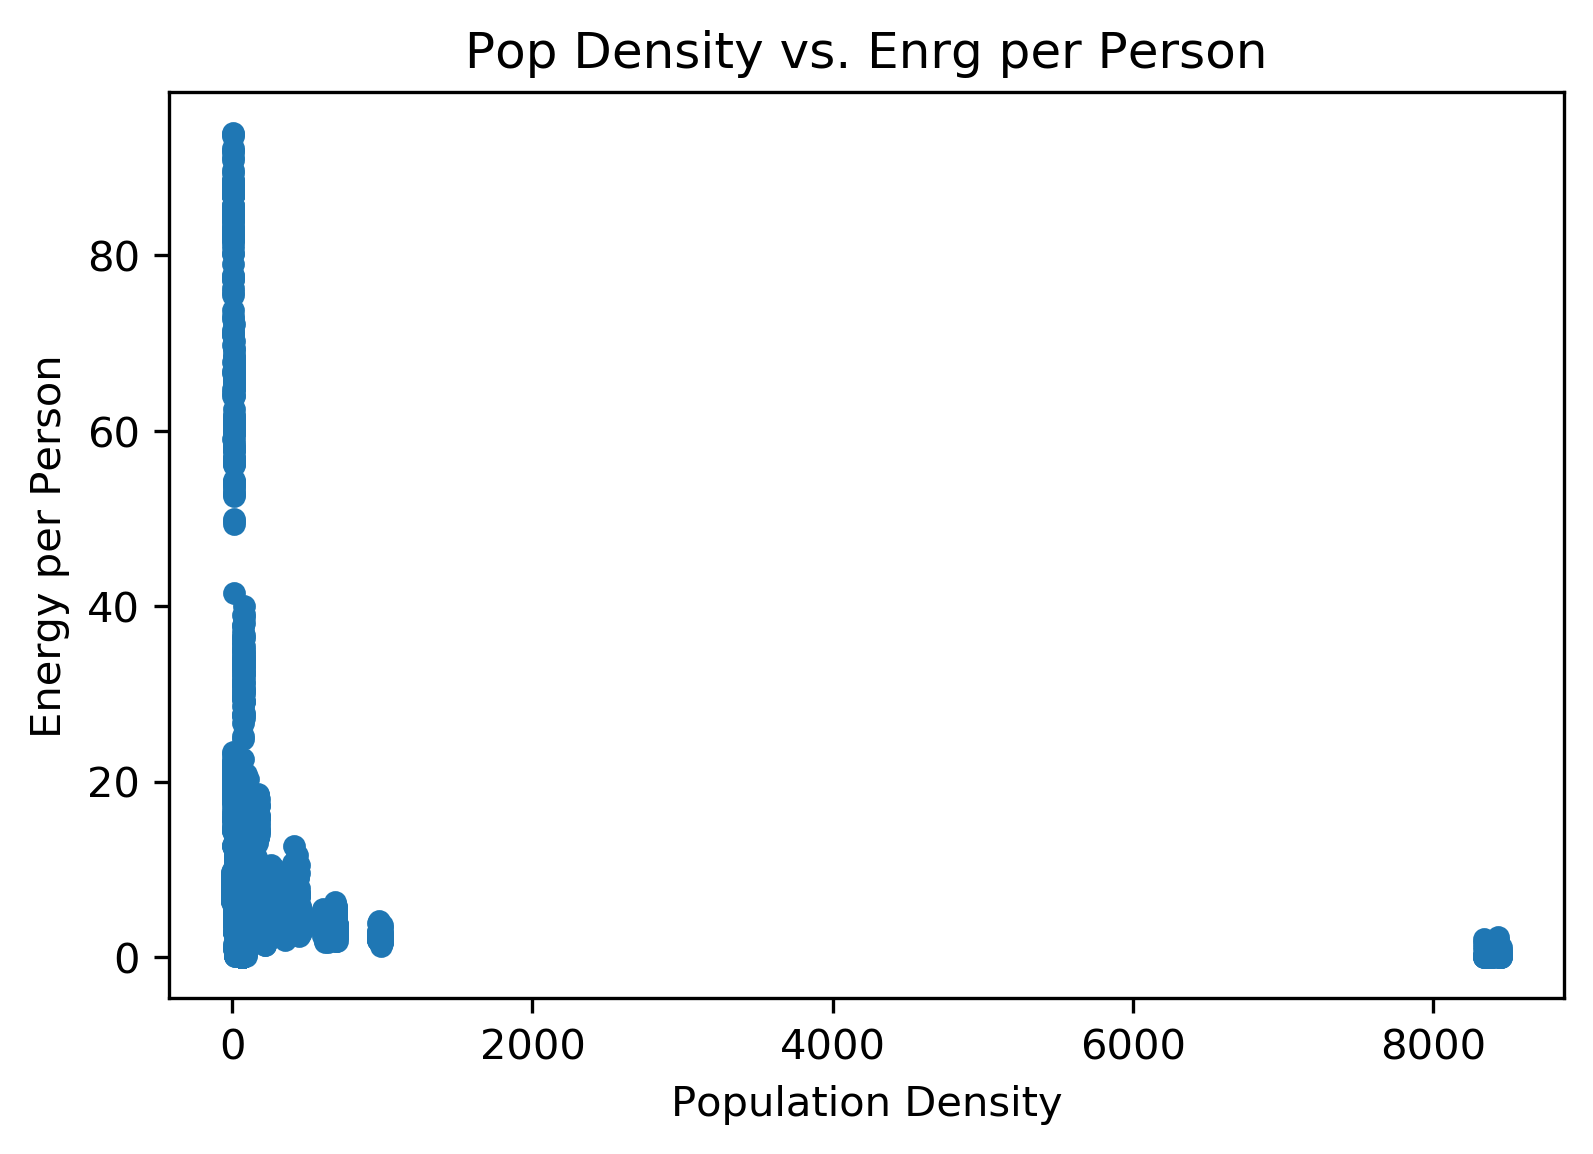

In [36]:
combined_df.plot(kind="scatter", x="Population Density", y="Energy per Person", title="Pop Density vs. Enrg per Person")

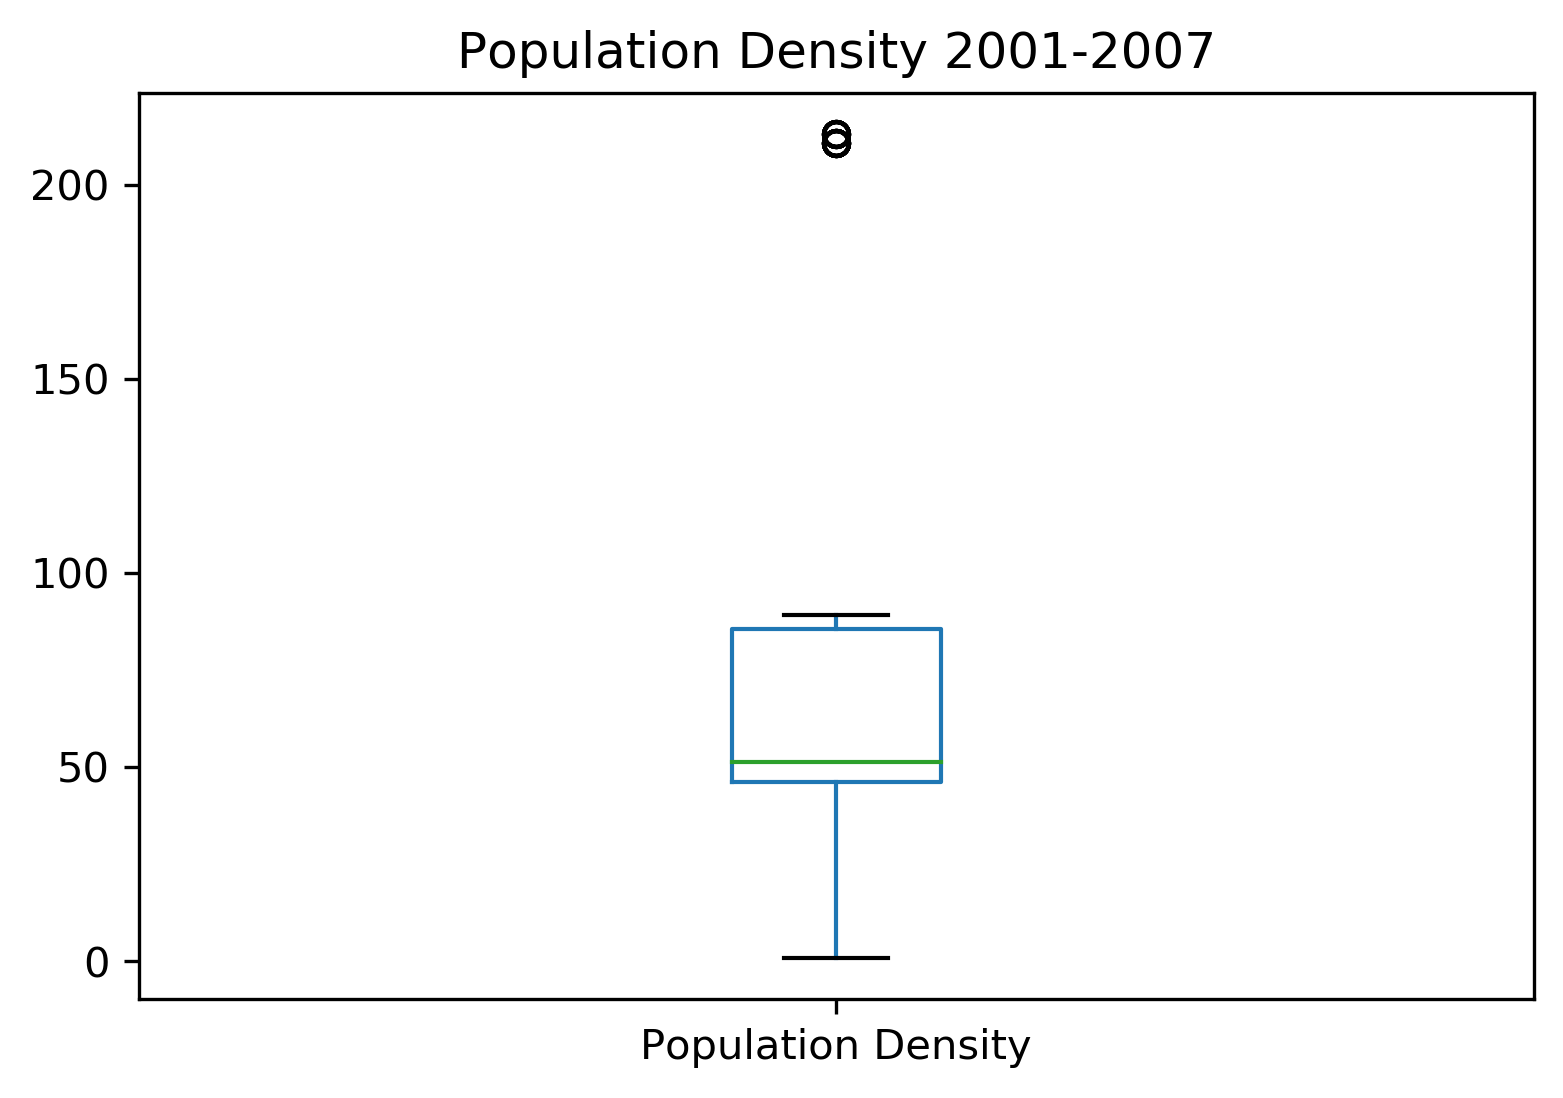

In [74]:
# combined_df["Population Density"].plot(kind="box")
yearly_merged_df["Population Density"].plot(kind="box", title="Population Density 2001-2007")
ax.figure.savefig("Images/Population Density_2001_2007.png", DPI=300)

In [52]:
combined_nOut_df = combined_df[combined_df["Population Density"]<2000]
high_energy_states = ['West Virginia', 'Wyoming', 'North Dakota']
combined_nOut_df = combined_nOut_df[~combined_nOut_df['State'].isin(high_energy_states)]

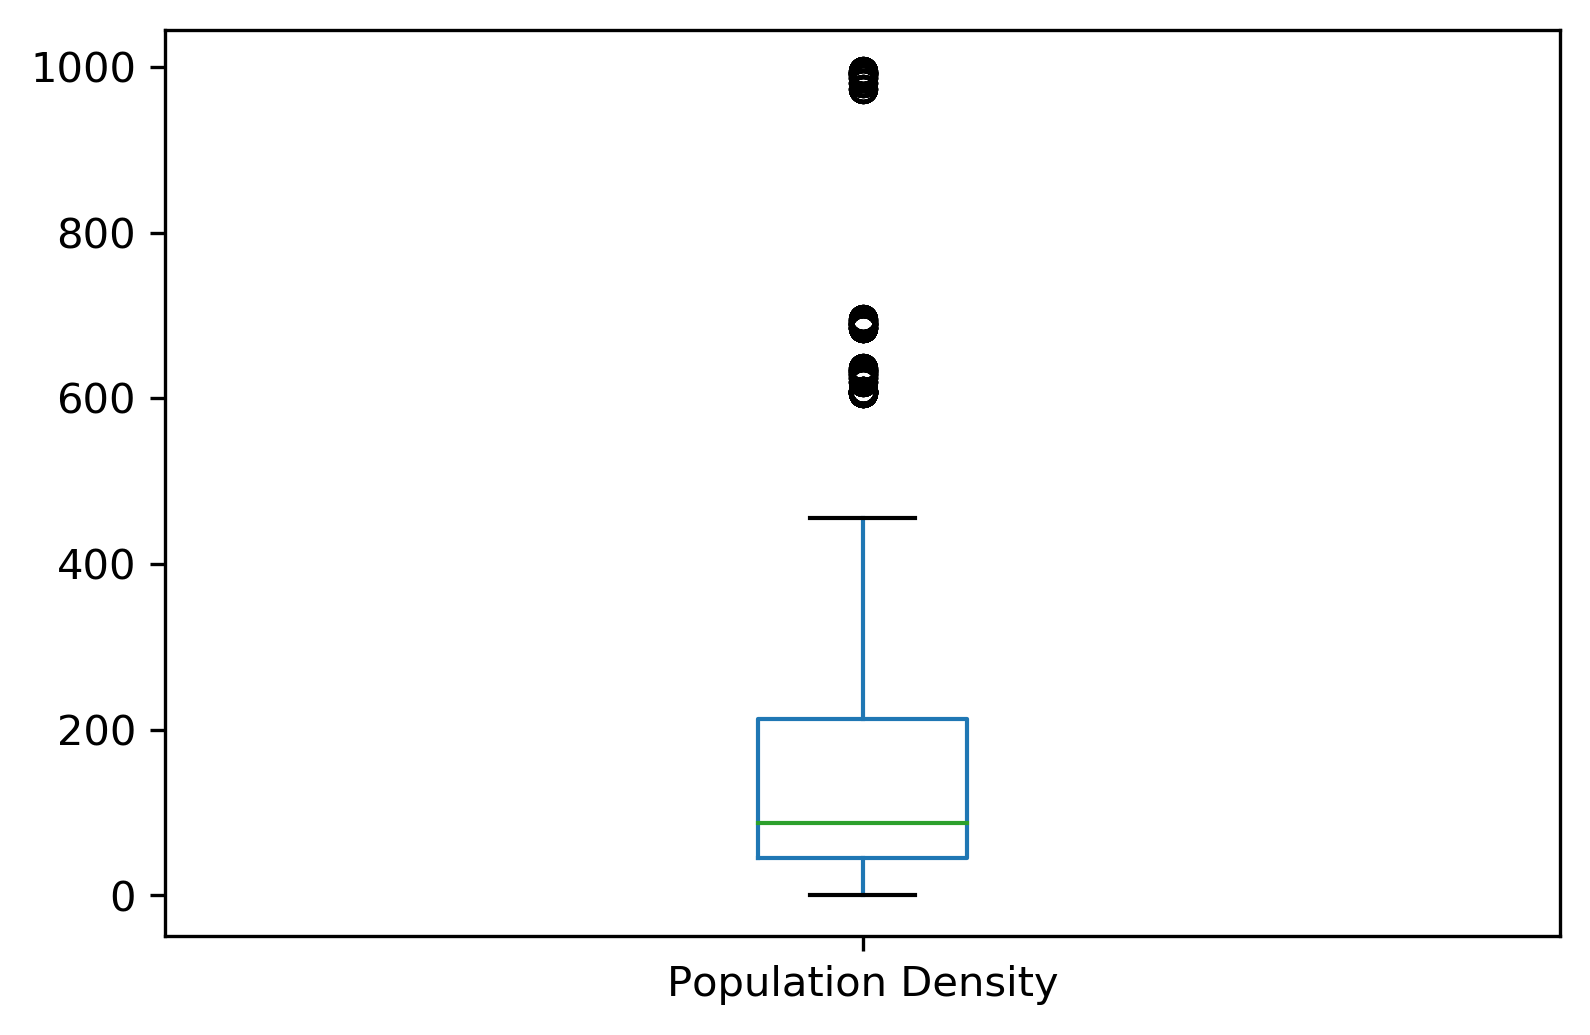

In [53]:
combined_nOut_df["Population Density"].plot(kind="box")

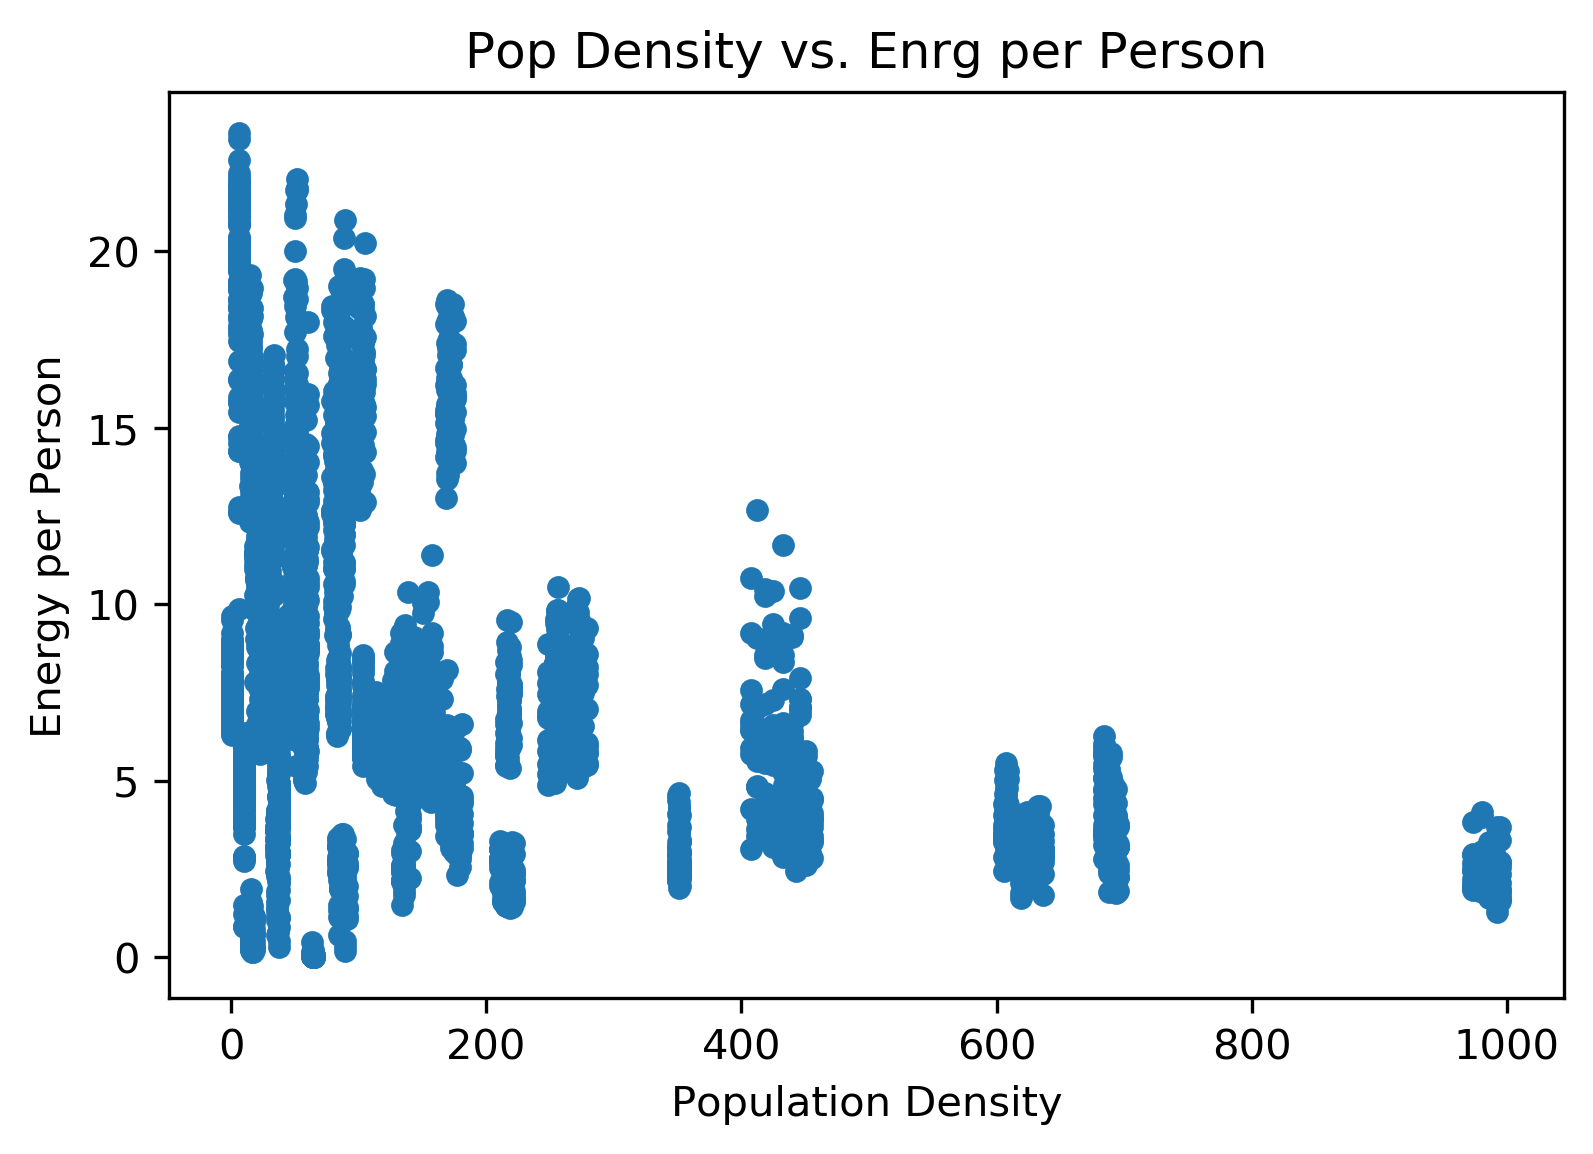

In [54]:
combined_nOut_df.plot(kind="scatter", x="Population Density", y="Energy per Person", title="Pop Density vs. Enrg per Person")

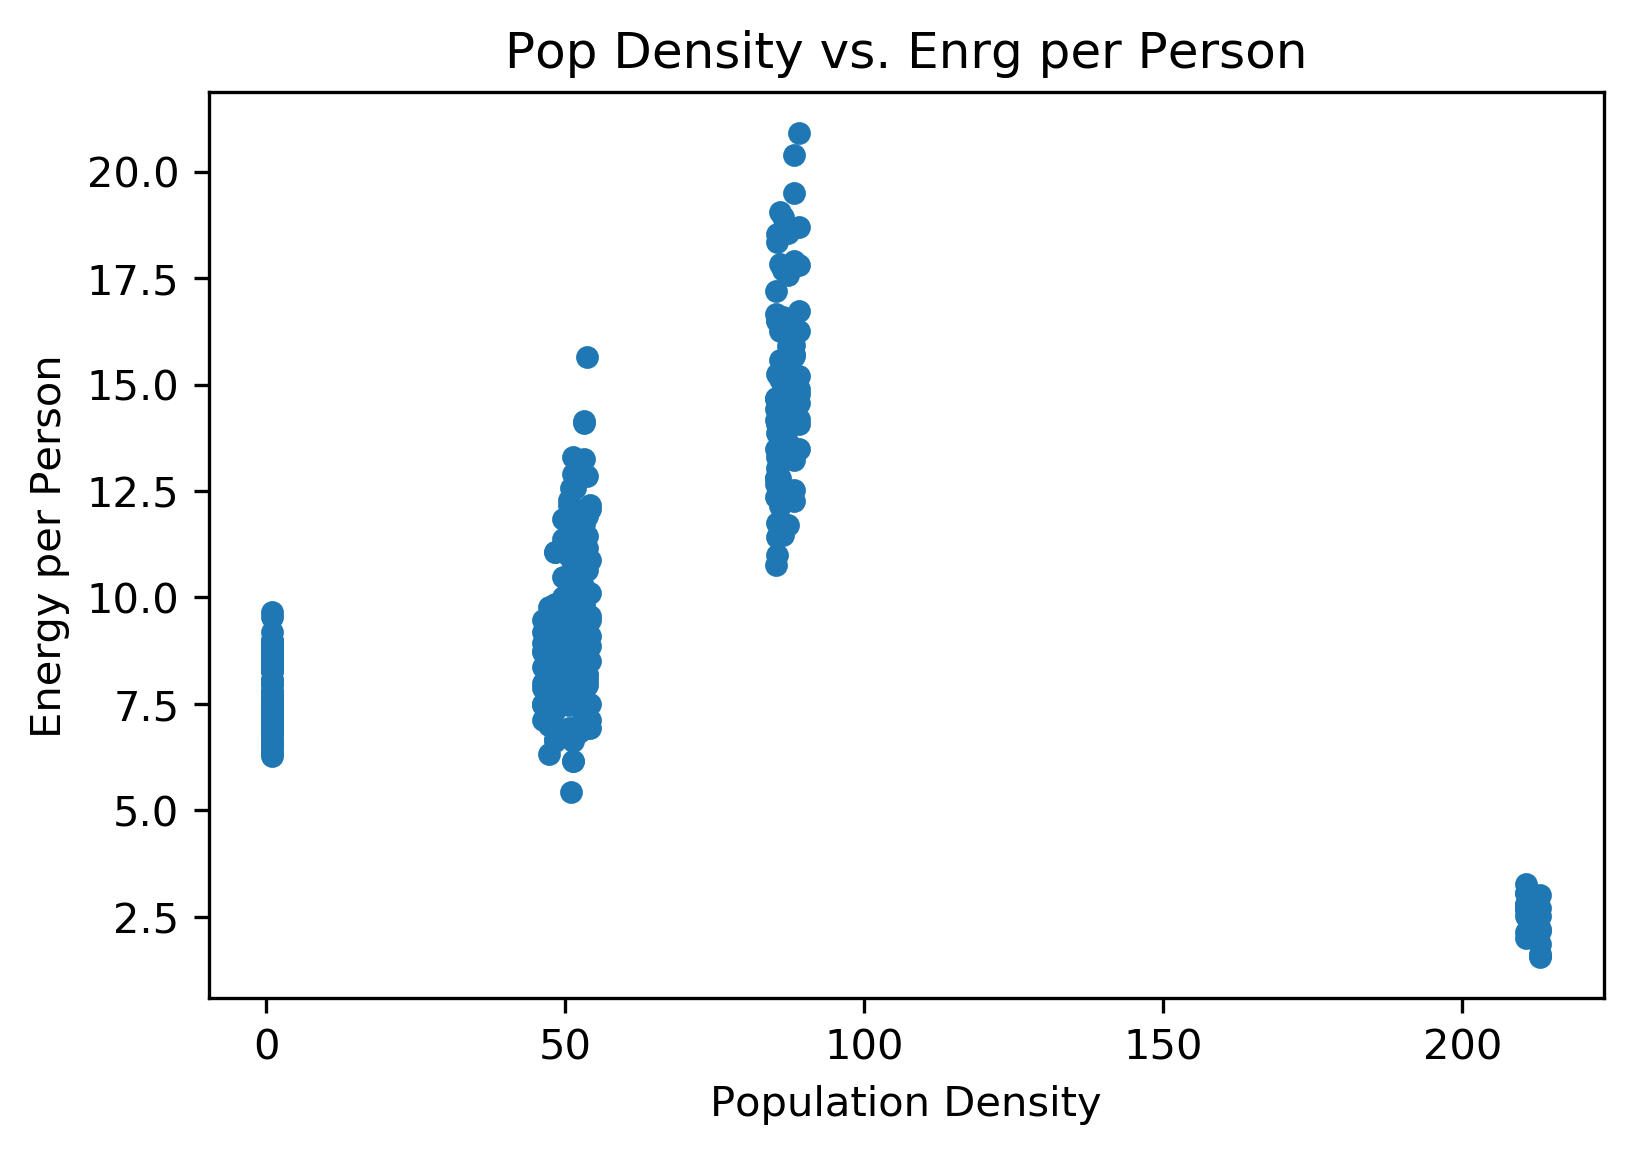

In [72]:
yearly_merged_df.plot(kind="scatter", x="Population Density", y="Energy per Person", title="Pop Density vs. Enrg per Person")